In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Skip this cell if CSR2D/ is already added under PYHTONPATH 
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)  

In [19]:
import numpy as np
from csr2d.kick2 import csr2d_kick_calc

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 13}
matplotlib.rc('font', **font)

import scipy.constants
#mec2 = scipy.constants.value('electron mass energy equivalent in MeV')*1e6
#c_light = scipy.constants.c
e_charge = scipy.constants.e
#r_e = scipy.constants.value('classical electron radius')

## Beam definition

In [7]:
# Yunhai's beam

gamma = 5000
rho = 1.5 # Bend radius in m

# Total charge
Nb = 6.25e9
Q = e_charge * Nb

## Additional parameters
beta = (1-1/gamma**2)**(1/2)
mc2 = 510998.950
p0c = gamma * beta * mc2  # in eV

# fix random seed 
np.random.seed(0)

# Number of macro particles
Np = 1000000

# charge of one macro-particle
charges = np.ones(Np)*Q/Np  

# Beam emittance
norm_emit_x = 1e-6           # in m
emit_x = norm_emit_x / gamma # in m

sigma_x = 50e-6
sigma_xp = emit_x / sigma_x
sigma_y = 0
sigma_yp = 0
sigma_z  = 50e-6
sigma_delta = 0

beam = np.zeros((6, Np))
beam[0] = np.random.normal(0, sigma_x , size=(1, Np))
beam[1] = np.random.normal(0, sigma_xp , size=(1, Np))
beam[2] = np.random.normal(0, sigma_y , size=(1, Np))
beam[3] = np.random.normal(0, sigma_yp , size=(1, Np))
beam[4] = np.random.normal(0, sigma_z , size=(1, Np))
beam[5] = np.random.normal(0, sigma_delta , size=(1, Np))

## Steady-state wake computation

In [9]:
result = csr2d_kick_calc(
    beam[0],
    beam[4],
    charges,
    gamma=gamma,
    rho=rho,
    nz=500,
    nx=500,
    debug=True
)

Depositing particles takes: 0.6216444969177246 s
Computing potential grids take: 0.05441880226135254 s
Convolution takes: 0.22259235382080078 s
Interpolation with map_coordinates takes: 0.26352405548095703 s


In [15]:
zvec = result['zvec']
xvec = result['xvec']

Ws_grid = result['Ws_grid']
Wx_grid = result['Wx_grid']

In [26]:
x_observe = 60e-6
x_observe_index = np.argmin(np.abs(xvec - x_observe))
print('x_observe_index :', x_observe_index )

x_observe_index : 318


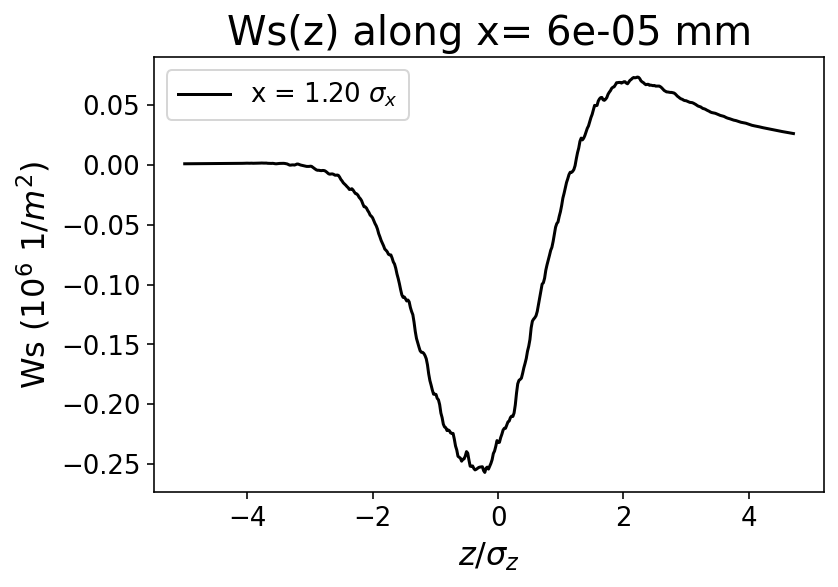

In [33]:
plt.plot(zvec/sigma_z, Ws_grid[:,x_observe_index]/1e6, '-', color='black', label=f"x = {x_observe/sigma_x:3.2f} $\sigma_x$");
plt.xlabel(r'$z/\sigma_z$', fontsize=16)
plt.ylabel(r'Ws $(10^6~1/m^2)$', fontsize=16)
plt.title(f"Ws(z) along x= {x_observe} mm",  fontsize=20)
plt.legend()

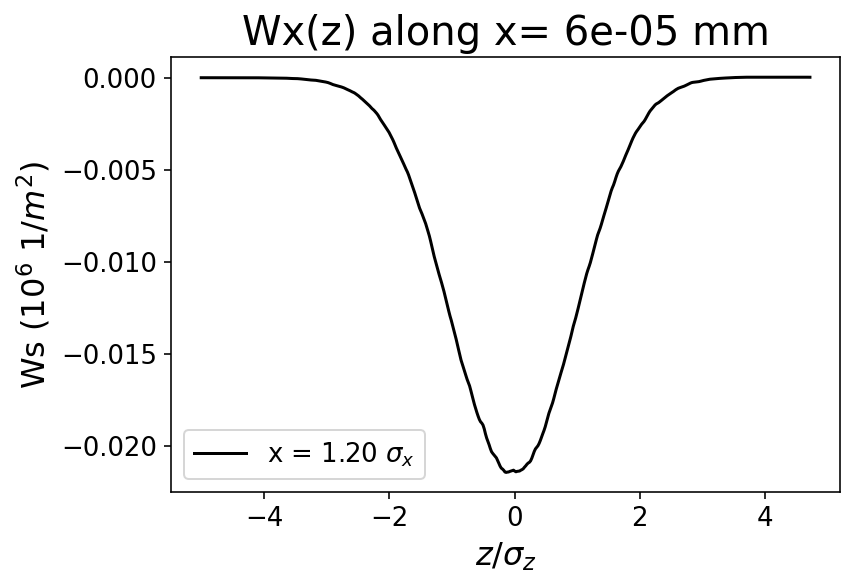

In [35]:
plt.plot(zvec/sigma_z, Wx_grid[:,x_observe_index]/1e6, '-', color='black', label=f"x = {x_observe/sigma_x:3.2f} $\sigma_x$");
plt.xlabel(r'$z/\sigma_z$', fontsize=16)
plt.ylabel(r'Ws $(10^6~1/m^2)$', fontsize=16)
plt.title(f"Wx(z) along x= {x_observe} mm",  fontsize=20)
plt.legend()